# Computer vision and convolutional neural networks

## This week's problem:
## Train a Neural Network to distinguish between handwritten letters

### Description

<div>
<img src="./Figures/letters.png" width="400" align="center">
</div>

One of the main applications of neural networks in computer vision is image classification. In the `Letters` folder, accompanying the notebook, a collection of images of handwritten letters, downloaded from [kaggle](https://www.kaggle.com/datasets/sachinpatel21/az-handwritten-alphabets-in-csv-format), can be found, sorted by letter. We would like to train a neural network to classify these images, based on part of the dataset, and then validate our network for the remaining mages. 

## Computer vision

<br />
<br />

<div>
<img src="./Figures/object_detection.jpg" width="400" align="center">
    <br/><a align="center" href=https://commons.wikimedia.org/w/index.php?curid=75843378 > By (MTheiler) - Own work, CC BY-SA 4.0 url</a>
</div>

Before getting into the specifics of classifying images with neural networks, it is useful to introduce some basic concepts from Computer Vision (CV),a very broad, interdisciplinary field with a wide range of applications such as:

+ Optical character recognition
+ Facial recognition
+ Imaging based robot guidance

In this lecture, we will only introduce some basic concepts, relevant to our purposes.

### OpenCV

To demonstrate the concepts introduced, we will employ [OpenCV](https://opencv.org/), an open source CV library for python and other languages. It does not come preinstalled with Anaconda, therefore it has to be installed by running the following command in an Anaconda (Windows) or regular (Mac) command line:

```pip install opencv-python```

Once it has been installed, it can be installed, it can be imported as:

In [2]:
import cv2

### Digital images

<div>
<img src="./Figures/flower_pixels.png" width="500" align="center">
</div>

Digital images can be obtained from different sources and come in different formats, such as .jpg, .png, .bmp. Digital images are essentially rectangular arrays of picture elements or pixels. Each pixel can be considered as a sample of the image at a certain location, with its color or intensity an approximation of the image's color or intensity.

Mathematically, digital images can be represented as two or three dimensional arrays, depending on whether they are colored or gray scale.

More specifically, grayscale images can be represented as:

$$I\left( i,j \right)$$

where:

- $I$ is the array representing the image.

- Element $i,j$ of the array corresponds to a pixel at the same location in the image.

- Values represent the color as an integer with values between 0 and 255, where 0 corresponds to black, 255 to white and intermediate values to different shades of gray.

<div>
<img src="./Figures/pixel_image.png" width="400" align="center">
</div>

<table align="center">
  <tr>
     <td>
        <img src="./Figures/flower.jpg" width="250">
         <br/><a align="center">Original image</a>
     </td>
     <td>
        <img src="./Figures/flower_red.jpg" width="250">
        <br/><a align="center">Red channel</a>
     </td>
      <td>
        <img src="./Figures/flower_blue.jpg" width="250">
        <br/><a align="center">Blue channel</a>
     </td>
      <td>
        <img src="./Figures/flower_green.jpg" width="250">
        <br/><a align="center">Green channel</a>
     </td>
  </tr>
</table>

For color images the third dimension corresponds to the intensity of different components of the color, For instance, in the RGB format, values along the third dimension correspond to the intensity of the red, green and blue components respectively. These different components are also called **channels**.

OpenCV can read images of different formats as:

In [3]:
#read image located at the Figures sub-directory of the directory where the notebook is located
fox = cv2.imread('.\Figures\Fennec-Fox.jpg')

The above creates a 3D array, whose dimensions are:

In [4]:
fox.shape

(1200, 1920, 3)

where:

+ The first dimension is the number of pixels in the vertical direction (1200).
+ The second dimension is the number of pixels in the horizontal direction (1920).
+ The third dimension is the number of channels needed to represent the pixel colors, can be 1 for grayscale and 3 for color images.



The image can be plotted using the `imshow` command from `pyplot` as:

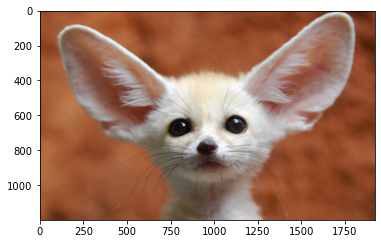

In [5]:
import cv2
from matplotlib import pyplot as plt

#plot image with pyplot
plt.imshow(fox[:,:,::-1])#a negative step is used in the last dimension since pyplot expects color channels in the oposite order
plt.show()

Color images can be converted to grayscale as:

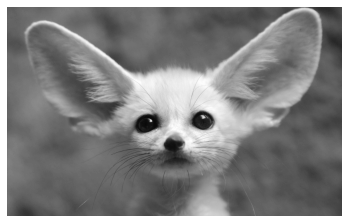

In [6]:
#opencv command to convert image, in this case, colors are changed from BGR to grayscale
foxGray = cv2.cvtColor(fox, cv2.COLOR_BGR2GRAY)

plt.imshow(foxGray, cmap='gray')#the colormap is set to gayscale
plt.axis('off') # this line turns axes off, displaying only the image
plt.show()

### Image histogram

Useful information for an image can be extracted from its histogram, where the number of pixels is plotted for each color intensity. With openCV, this can be done using the `calcHist` command, which requires the following input arguments:
- A list containing the image, whose histogram is to be calculated.
- A list with the channel for which the histogram is to be calculated.
- A mask to be used, in our case it will be set to `None`.
- The number of bins to be used. This is the number of possible intensity values, in our case 256 (0 to 255)
- The range of possible values. In our case this will be [0,256]. Notice that the last number os 256, not 255. The reason for that is that ranges in OpenCV do not include the last element.

Histograms for grayscale images can be calculated and plotted as:

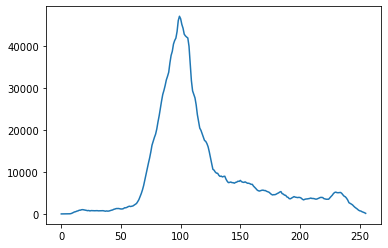

In [7]:
hist = cv2.calcHist([foxGray],[0],None,[256],[0,256])

plt.plot(hist)
plt.show()

For color images, a histogram can be plotted for each channel:

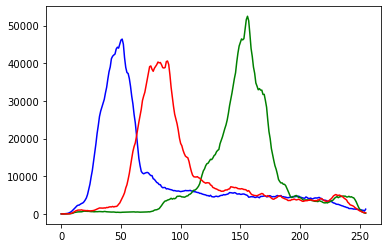

In [8]:
blue = cv2.calcHist([fox],[0],None,[256],[0,256]) #blue channel histogram
green = cv2.calcHist([fox],[1],None,[256],[0,256])  #green channel histogram
red = cv2.calcHist([fox],[2],None,[256],[0,256])  #red channel histogram

plt.plot(blue,'b')
plt.plot(red,'g')
plt.plot(green,'r')
plt.show()

### Monadic operations

One of the simplest types of image processing involes the application of some function to every single pixel of an image. This can be written as:

$$O\left(i,j\right) = f\left( I\left( i,j \right) \right)$$

For instance, a linear function can be applied as:

$$O\left(i,j\right) = \alpha I\left( i,j \right) + \beta $$

where:

- $\alpha$ alters the contrast of the original image.
- $\beta$ alters its brightness

In python, the above can be accomplished using numpy elementwise operations as well as the `clip` fuction to ensure that the resulting values are within the desired bounds (0 to 255):

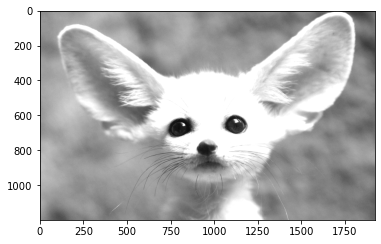

In [9]:
import numpy as np

#define alpha and beta
# try a few different values and observe their effect on the image 
alpha=1.5
beta=0

#convert image to numpy array of type int
#this is necessary to allow values > 255
foxNumpy = np.array(foxGray,dtype=int)

#use elementwise operations to change contrast/brightness
#and clip to restrict resulting values in the interval 0-255
fox2=np.clip(alpha*foxNumpy+beta,0,255)

plt.imshow(fox2, cmap='gray')
plt.show()

Equivalent results can be accomplished more efficiently with the `convertScaleAbs` function offered by OpenCV:

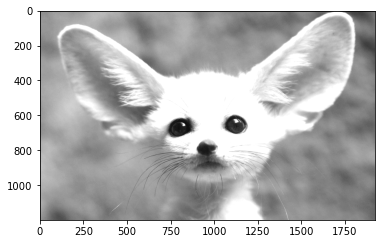

In [10]:
#alpha and beta have the same meaning as before
fox3 = cv2.convertScaleAbs(foxGray, alpha=alpha, beta=beta)

plt.imshow(fox3, cmap='gray', vmin=0, vmax=255)
plt.show()

Another useful operation of this type is thresholding, where all pixels with value below the threshold are given a value 0 and all pixels with a value above the threshold are set to 255. This can be accomplished simply as:

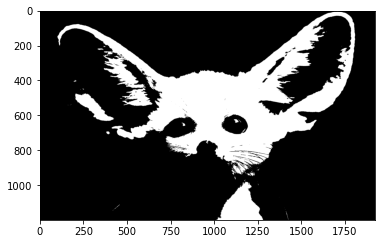

In [11]:
#the comparison will convert the image to an array with values 0 and 1
#depending on whether the initial values below or above the threshold
plt.imshow(foxGray>140, cmap='gray')
plt.show()

Similar results can be achieved with the `threshold` function from OpenCV, which offers further options:
- The value to be assigned to pixels with values above the threshold can be set as the third argument of the function.
- The type of thresholding can be specified with the third argument. In our case, `THRESH_BINARY` will be use, which is equivalent to what was described above, however more options are available, as described in the function's [documentation](https://docs.opencv.org/4.x/d7/d4d/tutorial_py_thresholding.html).

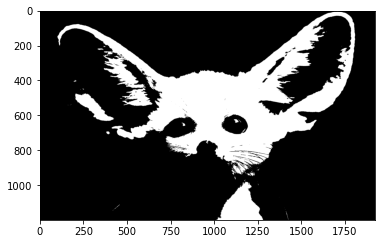

In [12]:
threshold, foxThreshold = cv2.threshold(foxGray,140,255,cv2.THRESH_BINARY)

plt.imshow(foxThreshold, cmap='gray')
plt.show()

### Diadic operations

More operations can be performed between two images of the same size. These can be collectively written as:

$$O\left(i,j\right) = f\left( I_1\left( i,j \right), I_2\left( i,j \right) \right)$$

An interesting example of such an operation is image blending, which can be mathematically expressed as:

$$O\left(i,j\right) = \alpha I_1\left( i,j \right)+ \left( 1-\alpha \right) I_2\left( i,j \right) $$

In OpenCV, it can be implemented using the `addWeighted` function, which performs more general operations of the type:

$$O\left(i,j\right) = \alpha I_1\left( i,j \right) + \beta I_2\left( i,j \right) + \gamma $$

To demonstrate the operation, lets load an additional picture of a wall. The original color image can be loaded directly as a grayscale one by passing the additional `IMREAD_GRAYSCALE` option to the `imread` function:

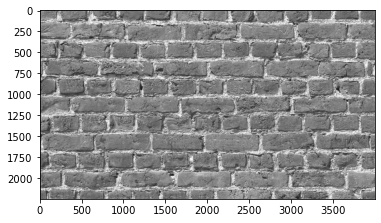

In [13]:
wallGray = cv2.imread('.\Figures\wall.jpeg',cv2.IMREAD_GRAYSCALE)

plt.imshow(wallGray, cmap='gray')
plt.show()

The wall image has a different resolution than the fox image, however, to perform dyadic operations, the two images should be of the same size. The image can be resized using the `resize` function:

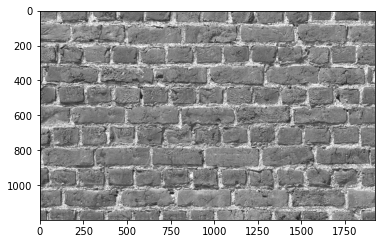

In [14]:
#resize wallGray image to size 1920X1200
wallGray=cv2.resize(wallGray,[1920,1200])

plt.imshow(wallGray, cmap='gray', vmin=0, vmax=255)
plt.show()

Then `addWeighted` can be used to blend the images as follows:

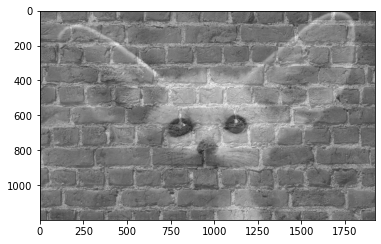

In [15]:
alpha=0.5

beta = (1.0 - alpha)
wallFox = cv2.addWeighted(wallGray, alpha, foxGray, beta, 0.0)

plt.imshow(wallFox, cmap='gray', vmin=0, vmax=255)
plt.show()

Interesting effects, such as background replacement, can be achieved through combinations of thresholding and blending:

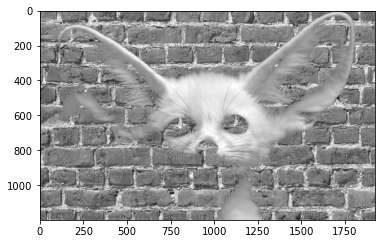

In [16]:
#apply threshold and store location of pixels with values exceeding threshold
white = np.argwhere(foxGray>130)

#copy background image (wall)
wallFox2=wallGray.copy()

#in the new picture, replace pixels detected above with the corresponding pixels from
#the fox image
wallFox2[white[:,0],white[:,1]]=foxGray[white[:,0],white[:,1]]

plt.imshow(wallFox2, cmap='gray')
plt.show()

### Convolution

Another important category of operations that can be applied to images is **linear filtering**, where the value of each pixel of the new image is a function of the values of pixels from a region around the original pixel. A very useful type of linear filtering is convolution, which can be expressed mathematically as:

$$O\left(i,j\right) = \Sigma_m \Sigma_n I\left( i-m,j-n \right) K\left( m,n \right) $$

where:

- $K$ is a matrix, termed kernel, whose size is $\left(2h+1\right)\times\left(2h+1\right)$, with $h$ significantly smaller than the size of $I$.
- Indices $m,n$ assume values in the interval $\left[-h,h\right]$

As a result of the operation, the value of each pixel of the resulting image is a weighted sum of the values of surrounding pixels. This is illustrated in the following figure for an input image of size $8\times8$, an output image of size $6\times6$ and a kernel of size $3\times3$:

<div>
<img src="./Figures/convolution.gif" width="300" align="center">
    <br/><a align="center" href=https://github.com/vdumoulin/conv_arithmetic > Animation taken from (Dumoulin and Visin 2018) </a>
</div>

As seen above, the output image is smaller in size than the original one since, for boundary pixels, some of the neighboring pixels do not exist, therefore the operation only involves interior pixels. The size of the output image can be controlled by assuming pixels beyond the limits of the original image exist and assume a certain value, typically zero. This technique is called **padding** and depending on how exactly it is performed, different cases can be distinguished, two of which are of interest herein:

- **Valid padding** is the case when no padding is used, resulting in a slightly smaller image.
- **Same padding** is the case when enough pixels are added to produce an output image of the same size as the original one.

The above cases are illustrated in the following figures:

<table align="center">
  <tr>
     <td>
        <img src="./Figures/convolution.gif" width="300" align="center">
         <br/><a align="center">Valid padding</a>
     </td>
     <td>
        <img src="./Figures/same_padding.gif" width="300" align="center">
        <br/><a align="center">Same padding</a>
     </td>
  </tr>
</table>

#### Smoothing

As a simple example of convolution, consider a $k\times k$ kernel of the form:

$$K = \dfrac{1}{k^2} \left[	
	\begin{array}{c c c }
    	1 & 1 & \dots  & 1 \\
     	1 & 1 & \dots  & 1 \\
        \vdots & \vdots & \ddots & \vdots \\
        1 & 1 & \dots  & 1\end{array}\right]$$
        
When applied to an input image, it will lead to an image whose every pixel is the average of pixels in a $k\times k$ area around the original pixel. Visually, this will produce a blurring or defocus effect.

To illustrate the above, the following image can be considered:

In [ ]:
coaGray = cv2.imread('.\Figures\exeter.jpg', cv2.IMREAD_GRAYSCALE)

plt.imshow(coaGray, cmap='gray')
plt.show()

A kernel of arbitrary size, can be defined as a numpy array:

In [ ]:
size=15 #here you can try different sizes to test their effect on the image

k1=np.ones([size,size])/size**2

Then, the `filter2D` function from OpenCV can be used to apply this kernel to the image using:

- the riginal image as the first input argument
- -1 as the second input argument. This will keep the data type of each pixel the same as in the original image.
- The kernel as the third input argument

In [ ]:
coaFilter1=cv2.filter2D(coaGray,-1,k1)

plt.imshow(coaFilter1, cmap='gray', vmin=0, vmax=255)
plt.show()

Another popular type of blurring, is Gaussian blurring, which employs a kernel of the form:

$$G = \dfrac{1}{2\pi\sigma^2} e^{-\dfrac{i^2+j^2}{2\sigma^2}}$$

where $\sigma$ is the standard deviation, which can be used to further control the kernel.

With OpenCV. Gaussian blurring can be applied using the `GaussianBlur` function.

The next example illustrates how different types of blurring compare:

In [ ]:
#load image of a flower
flower = cv2.imread('.\Figures\\flower.jpg')
#set plot size
plt.figure(figsize=(15,15))
#plot original image
plt.subplot(1,3,1).imshow(flower[:,:,::-1])
plt.axis('off')
plt.title('Original')
#create 21x21 kernel
size=21 #here you can try different sizes to test their effect on the image
k2=np.ones([size,size])/size**2
#apply kernel
flowerAverage = cv2.filter2D(flower,-1,k2)
#plot image with average smoothing
plt.subplot(1,3,2).imshow(flowerAverage[:,:,::-1])
plt.axis('off')
plt.title('Average')
#create image with Gaussian smoothing
flowerGaussian=cv2.GaussianBlur(flower,(size,size),0)
#plot image with Gaussian smoothing
plt.subplot(1,3,3).imshow(flowerGaussian[:,:,::-1])
plt.axis('off')
plt.title('Gaussian')
plt.show()

Another interesting effect that can be accomplished using convolution is edge detection. For instance, if the output value of each pixel is set to the difference between the pixels to its left and right, the resulting operation can be written as:

$$O\left(i,j\right)=I\left(i+1,j\right)-I\left(i-1,j\right)$$

which is equivalent to convolution with the kernel:

$$K = \left[	
	\begin{array}{c c c }
    	0 & 0 & 0 \\
       -1 & 0 & 1 \\
        0 & 0 & 0\end{array}\right]$$
        
This can be thought of as a derivative of the image in the horizontal direction. When applied to an image it highlights vertical edges:

In [ ]:
k2 = np.array([[0, 0, 0],[-1, 0, 1],[0, 0, 0]])

coaFilter2=cv2.filter2D(coaGray,-1,k2)

plt.imshow(coaFilter2, cmap='gray')
plt.show()

Similarly, the kernel:

$$K = \left[	
	\begin{array}{c c c }
    	0 & 1 & 0 \\
        0 & 0 & 0 \\
        0 &-1 & 0\end{array}\right]$$
        
can be used to detect horizontal edges:

In [ ]:
k3 = np.array([[0, 1, 0],[0, 0, 0],[0, -1, 0]])

coaFilter3=cv2.filter2D(coaGray,-1,k3)

plt.imshow(coaFilter3, cmap='gray')
plt.show()

A kernel of the form:

$$K = \left[	
	\begin{array}{c c c }
    	-1 & -1 & -1 \\
        -1 &  8 & -1 \\
        -1 & -1 & -1\end{array}\right]$$
        
can be used to highligh edges in both directions:

In [ ]:
k4 = np.array([[-1, -1, -1],[-1, 8, -1],[-1, -1, -1]])

coaFilter4=cv2.filter2D(coaGray,-1,k4)

plt.imshow(coaFilter4, cmap='gray')
plt.show()

### Edge detection

OpenCV offers even more sophisicated edge detection argorithms, such as the [Canny](https://docs.opencv.org/3.4/da/d22/tutorial_py_canny.html) algorithm, which can be used as:

In [ ]:
#perform Canny edge detection to the foxGray image
#the second and third arguments are threshold used in the algorithm
edges = cv2.Canny(foxGray,40,40)

plt.imshow(edges, cmap='gray', vmin=0, vmax=255)
plt.show()

## Convolutional neural networks



### Convolutional layers

The layers of networks explored so far are called fully connected, since every unit of every layer is connected to every unit of the next. However, for applications involving structured data, such as images, it might be more meaningful to only consider interactions between each unit and a few of its neighbors. This is illustrated in the next figure:

<table align="center">
  <tr>
     <td>
        <img src="./Figures/fully_connected.png" width="250" align="center">
         <br/><a align="center">Fully conneted layers, each unit is connected to every other unit.</a>
     </td>
     <td>
        <img src="./Figures/convolutional.png" width="250" align="center">
        <br/><a align="center">Sparsely connected layers, each unit is only connected to its immediate neighbors.</a>
     </td>
  </tr>
</table>

#### Mathematical expression

Mathematically, the above corresponds to forcing some weights to assume a value of 0, leading to weight matrices of the form:

$$ \mathbf{W} = \left[	
	\begin{array}{c c c c c}
    	w_{11} & w_{12} & w_{13} & 0      & 0      & 0 & \dots  & 0 & 0        & 0        & 0\\
     	0      & w_{22} & w_{23} & w_{24} & 0      & 0 & \dots  & 0 & 0        & 0        & 0\\
        0      & 0      & w_{33} & w_{34} & w_{35} & 0 & \dots  & 0 & 0        & 0        & 0\\
        \vdots & \vdots & \ddots & \vdots \\
        0      & 0      & 0      & 0      & 0      & 0 & \dots  & 0 & w_{nm-2} & w_{nm-1} & w_{nm}\end{array}\right]$$
        
In the above, it has been assumed that each unit is only connect to its immediate neighbors.

#### Parameter sharing

If, in addition to the above, the set of weights used between neighboring inputs are kept the same, the weight matrix of the layer can be further simplified to:

$$ \mathbf{W} = \left[	
	\begin{array}{c c c c c}
    	w_{1} & w_{2} & w_{3} & 0      & 0      & 0 & \dots  & 0 & 0   & 0   & 0\\
     	0     & w_{1} & w_{2} & w_{3}  & 0      & 0 & \dots  & 0 & 0   & 0   & 0\\
        0     & 0     & w_{1} & w_{2} & w_{3}   & 0 & \dots  & 0 & 0   & 0   & 0\\
        \vdots& \vdots& \ddots & \vdots \\
        0     & 0     & 0      & 0      & 0     & 0 & \dots  & 0 & w_1 & w_2 & w_3\end{array}\right]$$
        
Notice that in the above, only a small number of weight values need to be determined during training.

#### Filters

The concept presented above for one-dimensional inputs, can be extended to two and three-dimensional inputs, allowing its application to grayscale and color images. In that case, it becomes equivalent to convolution, as presented above, hence the name **convolutional layers**, for layers performing this operation, and **convolutional neural networks (CNNs)** for networks with convolutional layers.

Convolutional layers correspond to linear filters, where the kernel size is determined a priori, while the values of the kernel are determined during training. Typically, a convolutional layer will involve multiple filters, each with different weights, while activation is also applied.

### Pooling

Another operation that is typically applied in combination to convolution is **pooling**. This consists of replacing all pixels in a neighborhood, for instance a rectangular domain, with a statistic of this domain, such as the maximum or average value.

Pooling can in general offer two advantages:

+ The size of the image can be reduced, since a set of pixels is replaced with a single value. This is important for reducing the computational cost of the network, especially for high resolution images.
+ The network becomes invariant with respect to small translations or noise. Since a whole neighborhood of pixels is replaced with a single value, the exact location of pixels within this neighborhood is not important.

### Architecture

For image classification, CNN architectures will typically involve:

+ A sequence of convolutional layers, each followed by a maximum pooling layer. These extract so called **features** from the input images, based on which the data can be more easily classified.
+ A sequence of fully connected layers, forming a MLP. These layers typicaly perform the classification task, once the input images have been converted to features.

### Example

Covolutional neural networks have proven very effective for applications involving images. To illustrate that, lets consider an example of image classification. An image dataset already available in tensoflow, and used in [this tutorial](https://www.tensorflow.org/tutorials/keras/classification), can be loaded for this purpose as:

In [ ]:
import tensorflow as tf

#load training and test images and labels
(imagesTrain, labelsTrain), (imagesTest, labelsTest) = tf.keras.datasets.fashion_mnist.load_data()

The dataset contains images of clothing items, more specifically the following 10 categories:

In [ ]:
classNames = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

The dataset comes as an array of size $N_{im}\times S_v\times S_h$, where $N_{im}$ is the number of images and $S_v,S_h$ are the dimensions of each image. For instance, for the training set:

In [ ]:
imagesTrain.shape

60,000 imgages of resolution $28\times28$ are provided.

Each image is provided in the same format as described previously, therefore they can be printed using the `imshow` command as shown above. Next a few images are plotted along with their labels:

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(imagesTrain[i], cmap=plt.cm.binary)
    plt.xlabel(classNames[labelsTrain[i]])
plt.show()

The images can be classified using a MLP, as shown last week, by adding an additional layer to convert them from 2D (or 3D for color images) arrays to 1D arrays that can be used as input for dense layers. As a first step, images are normalised, such that possible pixel values are restricted to the range $\left[ 0,1 \right]$:

In [ ]:
imagesTrain = imagesTrain / 255.0
imagesTest = imagesTest/255.0

Next, a MLP with a single hidden layer and 128 hidden units is defined. The only difference compared to the MLPs used last week is that a `flatten` layer needs to be added to convert the $28\times28$ pixel images to 1D inputs:

In [ ]:
model = tf.keras.Sequential()

#add flatten layer to convert images to 1d arrays
#the size of the input image (28x28) needs to be provided
model.add(tf.keras.layers.Flatten(input_shape=(28, 28)))

#add 1 hidden layer with 128 units and relu activation
model.add(tf.keras.layers.Dense(128,
                                activation = 'relu'))

#add final dense layer with softmax activation
model.add(tf.keras.layers.Dense(10,
                                activation = 'softmax'))

#compile and fit model for training set
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics='accuracy')

#train for 10 epochs
model.fit(imagesTrain, 
          labelsTrain, 
          epochs=10)

The accuracy obtained for the test set can be evaluated as:

In [ ]:
testLoss, testAcc = model.evaluate(imagesTest,  labelsTest, verbose=2)

An accuracy of over 80% can be obtained for the test set.

Next, we will attempt to classify the same dataset using the same network, but with a few convolutional and pooling layers before the dense layers. Using `keras`, this can be accomplished by adding layers of type [`Conv2D`](https://keras.io/api/layers/convolution_layers/convolution2d/) which require some additional parameters:

+ The first input argument should be the number of filters for the layer.
+ The second input argument should be a tuple with the size of the convolution kernel.
+ Optionally, the type of avtivation function to be used can be defined.
+ For the first layer of the network, the size of the input needs to be defined through the `input_shape` argument.

As shown in the [`Conv2D` documentation](https://keras.io/api/layers/convolution_layers/convolution2d/), more options are available, for instance the `padding` argument can be set to 'valid' or 'same' to implement the two types of padding discussed above.

In [ ]:
modelCNN = tf.keras.Sequential()

#add convolutional layer
modelCNN.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))

#add max pooling layer
modelCNN.add(tf.keras.layers.MaxPooling2D((2, 2)))

#add convolutional layer
modelCNN.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu'))

#add max pooling layer
modelCNN.add(tf.keras.layers.MaxPooling2D((2, 2)))

#add flatten layer to convert images to 1d arrays
modelCNN.add(tf.keras.layers.Flatten())

#add 1 hidden layer with 128 units and relu activation
modelCNN.add(tf.keras.layers.Dense(128,
                                activation = 'relu'))

#add final dense layer with softmax activation
modelCNN.add(tf.keras.layers.Dense(10,
                                activation = 'softmax'))

#compile and fit model for training set
modelCNN.compile(optimizer='adam',
                 loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 metrics='accuracy')

#train for 10 epochs
modelCNN.fit(imagesTrain, 
             labelsTrain, 
             epochs=10)

A summary of the network layers and parameters can be obtained as:

In [ ]:
modelCNN.summary()

The accuracy for the test set can be evaluated as:

In [ ]:
testLoss, testAcc = modelCNN.evaluate(imagesTest,  labelsTest, verbose=2)

### Visualising convolutional layers

As mentioned above, convolutional layers correspond to filters that can be applied to immages producing different effects. Visualising these filters can offer some further insight. This can be accomplished using the `Model` class offered by `keras`. 

In particular, the layers of our trained CNN need to be extracted first:

In [ ]:
#define a list containing the first two layers of the trained network
layerOutputs = [layer.output for layer in modelCNN.layers[:2]]

Next an instance of the `Model` class is created and the following arguments are provided:

- The `inputs` argument is set to the `input` attribute of our trained model.
- The `outputs` argument is set to the extracted layers

In [ ]:
activationModel = tf.keras.models.Model(inputs=modelCNN.input, outputs=layerOutputs)

A few images from the test set can be used to visualise the filters of the convolutional layers. These can be extracted and visualised as:

In [ ]:
nfig=4
images = imagesTest[:nfig]

#plot image 0 from the extracted images
plt.imshow(images[0,:,:], cmap=plt.cm.binary)
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.show()

The output of all extracted layers can be computed for the extracted images as:

In [ ]:
activations=activationModel.predict(images)

The resulting object is a list, each element of which contains the output of a layer. For instance:

`activations[0]`

contains the output of the first layer.

Individual filters can be visualised as:

In [ ]:
#plot filter 0 of layer 1 for image 3
plt.imshow(activations[1][3, :, :, 0], cmap='viridis')
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.show()

Several filters can be visualised for several images as:

In [ ]:
nfilt=3
plt.figure(figsize=(12,12))
for i in range(nfig):
    plt.subplot(nfilt+1,nfig,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(images[i,:,:], cmap=plt.cm.binary)
c=nfig+1
for i in range(nfilt):
    for j in range(nfig):
        plt.subplot(nfilt+1,nfig,c)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(activations[0][j, :, :, i], cmap='viridis')
        c+=1
plt.show()

As seen above, some of the filters perform visually meaningful operations. For example, filters 1 and 2 (2nd and 3rd row) correspond to different types of edge detection.

## Summary

### Key points

In this lecture:

+ We introduced some computer vision basics.
+ We demonstrated the use of neural networks for image classification.
+ We introduced convolutional neural networks for image classification.

The above should allow us to solve today's problem!

### Resources

### Resources/Further reading

+ [OpenCV website](https://opencv.org/)
+ [`keras` website](https://keras.io/)
+ I. Goodfellow, Y. Bengio and A. Courville. *Deep learning*. MIT press, 2016 (library 006.31 GOO)
+ P.I. Corke O. Khatib. *Robotics, vision and control: fundamental algorithms in MATLAB*. Vol. 73. Berlin: Springer, 2011.
+ F. Chollet. *Deep learning with Python*. Simon and Schuster, 2021.

## Solving this week's problem

The first step for solving today's problem, is to load the image files. This can be done using the following function:

In [ ]:
import os
import cv2

def loadImageFiles(path, filesPerClass=0, colorFlag=cv2.IMREAD_UNCHANGED):
    """Function to load load images from athe provided path directory. 
       It is assumed that, within the directory, different folders will
       contain images from different classes. The optional argument filesPerClass
       can be used to select a subset of the total data from each class,
       if the default value of 0 is used, then all the available files are loaded.
       The optional argument colorFlag specifies how the files should be loaded, the default option is
       cv2.IMREAD_UNCHANGED, which will not change the type of the file, but the options
       cv2.IMREAD_COLOR and cv2.IMREAD_GRAYSCALE can also be used to read images as color and
       grayscale respectively.The function returns a numpy array whose first dimension corresponds to different images,
       and an array with the labels"""
    
    #initialise images and labels as empty lists
    images=[]
    labels=[]
    
    #initialise label counter to 0
    label=0
    
    #use os to find the names of all folders within the provided directory
    folders = os.listdir(path)
    
    #loop extracted folders
    for folder in folders:
        print('Loading folder: ', folder)
        
        #path to each folder
        folderPath=os.path.join(path, folder)
        
        #use os to find the names of all files in each folder
        files=os.listdir(folderPath)
        
        #set the number of files to read
        #if the filesPerClass argument is 0, then all available files are loaded
        #otherwise only the first filesPerClass
        if filesPerClass==0:
            nfiles=len(files)
        else:
            nfiles=filesPerClass
        
        #loop files in directory
        for f in files[:nfiles]:
            #path for each file
            filePath=os.path.join(folderPath, f)
            
            #check whether the created path actually contains a file
            if os.path.isfile(filePath):
                #read image using the provided flag for the type of color
                img = cv2.imread(filePath, colorFlag)
                #append image to the images list
                images.append(img)
                #append label to the labels list
                labels.append(label)
        
        #increase label counter
        label+=1
    
    #convert images and labels converted to numpy arrays
    return np.array(images), np.array(labels)

Out of the full data set, we will only load 1000 images from each class, this can be accomplished by using the optional argument of the provided function as:

In [ ]:
path='.\Letters'

letters,labels = loadImageFiles(path,filesPerClass = 1000)

The dataset can be split into a training and test set using `train_test_split` and a 50-50 split:

Next data should be normalised:

Then a model can be created in exactly the same way as the example above:

The accuracy for the test set can also be tested:

Results can also be visualised in terms of the confusion matrix:

Finally, the output of individual layers can be visualised, as also illustrated above: